In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
test_df = pd.read_csv("C://dropout_MC//dropout_MC//_02_build//data//test_data.csv")
train_df = pd.read_csv("C://dropout_MC//dropout_MC//_02_build//data//train_data.csv")

In [45]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.io import shapereader
from shapely.geometry import box

In [63]:
def plot_temperature(df):

    # 1. 日本のポリゴンだけ取り出す
    shp_fname = shapereader.natural_earth(
    category='cultural',
    name='admin_0_countries',
    #scale='50m'
    )
    reader = shapereader.Reader(shp_fname)
    japan_geoms = [
        rec.geometry
        for rec in reader.records()
        if rec.attributes['ADM0_A3'] == 'JPN'
    ]

    # 2. クリッピング用ボックス（経度 150° まで、緯度は 20–48° の範囲で日本列島全体をカバー）
    clip_box = box(minx=-180, miny= -90, maxx=150, maxy= 90)

    # 3. ポリゴンをボックスと交差させる
    japan_clipped = [geom.intersection(clip_box) for geom in japan_geoms]

    lon_min, lon_max = 122, 145
    lat_min, lat_max = 20, 48

    df_map = df[
        (df['longitude'] >= lon_min) & (df['longitude'] <= lon_max) &
        (df['latitude']  >= lat_min)  & (df['latitude']  <= lat_max)
    ].copy()

    # 2. プロット
    fig = plt.figure(figsize=(6, 8))
    ax = plt.axes(projection=ccrs.PlateCarree())

    # 2‑a. 地図（日本）を zorder=1 で描画
    ax.add_geometries(
        japan_clipped,
        #japan_geoms,
        crs=ccrs.PlateCarree(),
        facecolor='lightgray',
        edgecolor='black',
        linewidth=1,
        zorder=1
    )

    # 2‑b. 点（観測所）を zorder=2 で描画
    sc = ax.scatter(
        df_map['longitude'],
        df_map['latitude'],
        c=df_map['temp'],
        cmap='coolwarm',
        #cmap='plasma',
        s=10,
        #edgecolor='black',
        transform=ccrs.PlateCarree(),
        zorder=2
    )

    # 3. カラーバー
    cb = plt.colorbar(sc, ax=ax, orientation='vertical', pad=0.02, shrink=0.5)
    cb.set_label('℃')

    # 4. ズーム範囲を日本列島に限定
    ax.set_extent([122, 148, 24, 46], crs=ccrs.PlateCarree())

    # タイトル
    ax.set_title('max templature', pad=12)

    plt.tight_layout()
    plt.show()


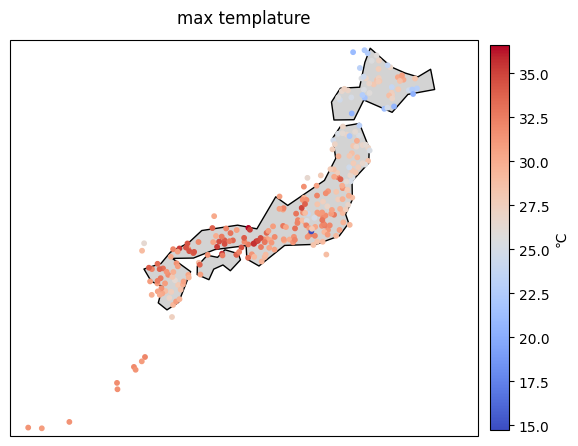

In [64]:
plot_temperature(test_df)